# Bmad interface example

In [1]:
from bpy_lattice.interfaces.bmad import write_bpy_lattice_csv
from pytao import Tao
import os

In [2]:
LATTICE_FILE = "lat.bmad"
CSV_FILE = "lat.layout_table"

LATTICE_STR = """no_digested
beginning[beta_a] = 1
beginning[beta_b] = 1
beginning[e_tot] = 1e9
parameter[geometry] = open



marker1: marker
drift1: drift, L = 1
ecollimator1: ecollimator, L = 1
instrument1: instrument, L =1 
lcavity1: lcavity, L =1
pipe1: pipe, L = 1
quadrupole1: quadrupole, L = 1
rcollimator1: rcollimator, L = 1
sbend1: sbend, L = 1, angle = pi/4
sextupole1: sextupole, L = 1
solenoid1: solenoid, L = 1
thick_multipole1: thick_multipole, L = 1
wiggler1: wiggler, L = 1, l_period = 0.1, n_period = 10



lat: line = (marker1,
drift1,
ecollimator1,
instrument1,
lcavity1,
pipe1, 
quadrupole1,
rcollimator1,
sbend1,
thick_multipole1,
wiggler1)
use, lat

"""


with open(LATTICE_FILE, "w") as f:
    f.write(LATTICE_STR)

/home/runner/miniconda3/envs/bpy_lattice-dev/lib/python3.11/site-packages/pytao/plotting/mpl.py:341: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return matplotlib.patches.PathPatch(


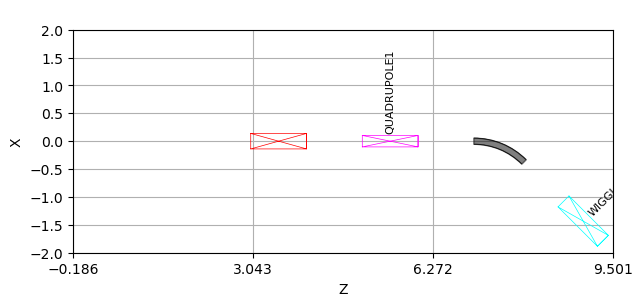

In [3]:
tao = Tao(lattice_file=LATTICE_FILE, plot="mpl")
tao.plot("floor", ylim=(-2, 2))

In [4]:
write_bpy_lattice_csv(tao, CSV_FILE)

In [5]:
!cat {CSV_FILE}

# ele_name, ix_ele, x, y, z, theta ,phi, psi, key, L, custom1, custom2, custom3, descrip
MARKER1, 1, 0.0, 0.0, 0.0, 0.0 ,0.0, 0.0, MARKER, 0.0, 0, 0, 0, 
DRIFT1, 2, 0.0, 0.0, 0.5, 0.0 ,0.0, 0.0, DRIFT, 1.0, 0, 0, 0, 
ECOLLIMATOR1, 3, 0.0, 0.0, 1.5, 0.0 ,0.0, 0.0, ECOLLIMATOR, 1.0, 0, 0, 0, 
INSTRUMENT1, 4, 0.0, 0.0, 2.5, 0.0 ,0.0, 0.0, INSTRUMENT, 1.0, 0, 0, 0, 
LCAVITY1, 5, 0.0, 0.0, 3.5, 0.0 ,0.0, 0.0, LCAVITY, 1.0, 0, 0, 0, 
PIPE1, 6, 0.0, 0.0, 4.5, 0.0 ,0.0, 0.0, PIPE, 1.0, 0.0, 0.0, 0.002, 
QUADRUPOLE1, 7, 0.0, 0.0, 5.5, 0.0 ,0.0, 0.0, QUADRUPOLE, 1.0, 0, 0, 0, 
RCOLLIMATOR1, 8, 0.0, 0.0, 6.5, 0.0 ,0.0, 0.0, RCOLLIMATOR, 1.0, 0, 0, 0, 
SBEND1, 9, -0.0969195893703571, 0.0, 7.48724767920222, -0.392699081698724 ,0.0, 0.0, SBEND, 1.0, 0.785398163397448, 0.0, 0.0, 
THICK_MULTIPOLE1, 10, -0.72647661917133, 0.0, 8.25386970675038, -0.785398163397448 ,0.0, 0.0, THICK_MULTIPOLE, 1.0, 0, 0, 0, 
WIGGLER1, 11, -1.43358340035788, 0.0, 8.96097648793693, -0.785398163397448 ,0.0, 0.0, WIGGLER, 1.0

# Cleanup

In [6]:
os.remove(LATTICE_FILE)
os.remove(CSV_FILE)